# STA130 HW 6

## Oct21 HW

### chatbot link: https://chatgpt.com/share/671819c1-a4ac-800e-9bc8-4e0777bbd983
### chatbot summary

### Assignment: Understanding Linear Regression and Least Squares

#### Objective:
To learn how to fit a linear regression model using Python and understand the concept of least squares in linear regression.

---

#### 1. **Fitting a Linear Regression Model Using Python**  
We used **`numpy`** and **`scipy.stats`** to create a linear regression model and fit the residuals to a normal distribution. Below is a summary of the steps involved in the code:

- **Generate Synthetic Data**: 
  - We generated random `x` values and calculated corresponding `y` values using a known linear relationship, adding some noise from a normal distribution.

- **Linear Regression**: 
  - The `scipy.stats.linregress` function was used to compute the best-fitting line, providing the slope, intercept, and other statistics.

- **Calculate Residuals**: 
  - Residuals were computed as the difference between the actual `y` values and the predicted `y` values from the regression.

- **Fit Residuals to a Normal Distribution**: 
  - We used `scipy.stats.norm.fit` to fit the residuals into a normal distribution, estimating the mean (`mu`) and standard deviation (`sigma`).

- **Visualization**:
  - The original data and the fitted line were plotted, and a histogram of the residuals was shown, overlaid with the fitted normal distribution curve.

#### 2. **Understanding Least Squares in Linear Regression**

- **Least Squares Method**:
  - In linear regression, the least squares method finds the best-fitting line by minimizing the sum of the squared differences between the observed data and the predicted values.

- **Residuals**:
  - The difference between the actual values and the values predicted by the model. Squaring these differences avoids negative values canceling out positive values and emphasizes larger errors.

- **Sum of Squared Errors (SSE)**:
  - The goal of least squares is to minimize the SSE, which is the sum of the squared residuals.

- **Why Square the Errors**:
  - Squaring ensures that all errors contribute positively, and it gives more weight to larger deviations from the line.

- **Formula for the Best-Fitting Line**:
  - The slope \(m\) and intercept \(b\) can be computed using formulas that minimize the SSE.

#### Conclusion:
This exercise provided a practical demonstration of fitting a linear regression model, calculating residuals, and using the least squares method to find the best-fitting line. The key concept of least squares ensures that the overall error between observed and predicted values is minimized for optimal results.

---

This summary provides a conceptual and practical understanding of linear regression and the least squares method, essential for building and evaluating models in data science and machine learning.

--- 

Would you like me to refine or add anything further to this assignment?

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, (working with a ChatBot if needed) create python code explicitly demonstrating your explanation using numpy and scipy.stats

    A theoretical simple linear regression is a some kind of normal distribution. Given a linear regression of Y_i = beta_0 + beta_1 * x_i + epsilon_i, where epsilon_i ~ N(0, sigma^2), the correlated normal distribution is Y ~ N(beta_0 + beta_1 * x_i, sigma^2), forming a sample of normal distribution. In the formula, the Y_i represents the output, beta_0 is the intercept, beta_1 is the slope, x_i is the predictor, and epsilon is the error. 

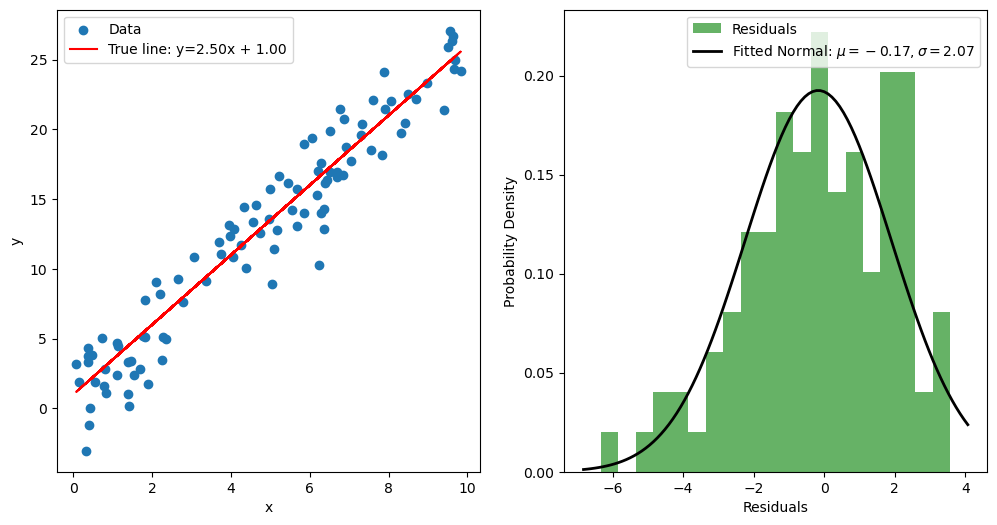

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generating synthetic data for linear regression
np.random.seed(114514)
x = np.random.rand(100) * 10  # Random x values between 0 and 10
true_slope = 2.5
true_intercept = 1.0
noise = np.random.normal(0, 2, size=x.shape)  # Adding some noise
y = true_slope * x + true_intercept + noise  # Linear relationship with noise

# Predicted y values based on the regression
y_pred = true_slope * x + true_intercept

# Calculate residuals (errors)
residuals = y - y_pred

# Fitting residuals into a normal distribution
(mu, sigma) = stats.norm.fit(residuals)

# Plotting the data and results
plt.figure(figsize=(12, 6))

# Scatter plot of original data and the regression line
plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, color="red", label=f"True line: y={true_slope:.2f}x + {true_intercept:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot residuals and fitted normal distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='g', label='Residuals')
xmin, xmax = plt.xlim()
x_vals = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x_vals, mu, sigma)
plt.plot(x_vals, p, 'k', linewidth=2, label=f'Fitted Normal: $\mu={mu:.2f}, \sigma={sigma:.2f}$')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


### 2. Continuing the previous question... (working with a ChatBot if needed) use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf


In [2]:
import pandas as pd
import statsmodels.formula.api as smf

data = pd.DataFrame({"x": x, "y": y})
model = smf.ols(formula="y ~ x", data=data).fit()
param = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1257.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.07e-57
Time:                        02:11:06   Log-Likelihood:                -214.51
No. Observations:                 100   AIC:                             433.0
Df Residuals:                      98   BIC:                             438.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5930      0.397      1.494      0.138      -0.194       1.380
x              2.5503      0.072     35.450      0.000       2.408       2.693
==============================================================================
Omnibus:                        2.825   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.830
Skew:                          -0.390   Prob(JB):                        0.243
Kurtosis:                       2.731   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

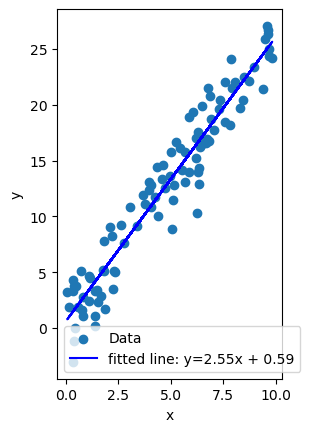

In [3]:
slope, intercept = param["x"], param["Intercept"]
fitted_line = slope * x + intercept

plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Data")
plt.plot(x, fitted_line, color="blue", label=f"fitted line: y={slope:.2f}x + {intercept:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 3. Continuing the previous questions... (working with a ChatBot if needed) add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words


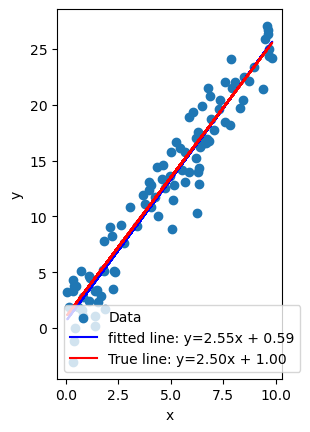

In [4]:
plt.subplot(1, 2, 1)
plt.scatter(x, y, label="Data")
plt.plot(x, fitted_line, color="blue", label=f"fitted line: y={slope:.2f}x + {intercept:.2f}")
plt.plot(x, y_pred, color="red", label=f"True line: y={true_slope:.2f}x + {true_intercept:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

the red line is the true line, while the blue line is the fitted line. The two lines show little difference between each other, where the slope of the fitted line is 0.05 higher, and the intercept is 0.41 lower

### 4. Continuing the previous questions... (working with a ChatBot if needed) explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

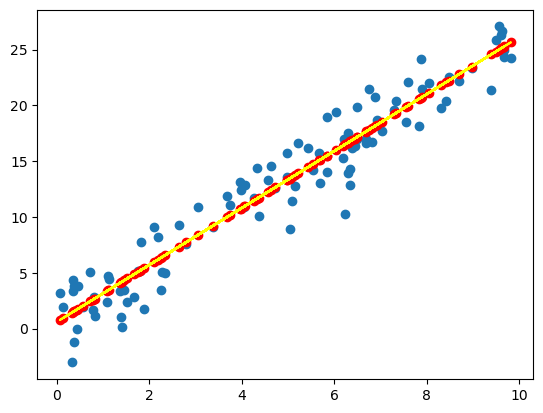

In [5]:
plt.scatter(x, y, label="Data")
plt.scatter(x, model.fittedvalues, color="red", label=f"True line: y={true_slope:.2f}x + {true_intercept:.2f}")
plt.plot(x, fitted_line, color="yellow", label=f"fitted line: y={slope:.2f}x + {intercept:.2f}")

the red dots are from `model.fittedvalues`, while the yellow line is the fitted line calculated with `model.params`. As shown in the graph, the red dots are on the yellow line, which means that `model.fittedvalues` are calculated based on `model.params`

### 5. Building on the previous questions... (working with a ChatBot if needed) explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

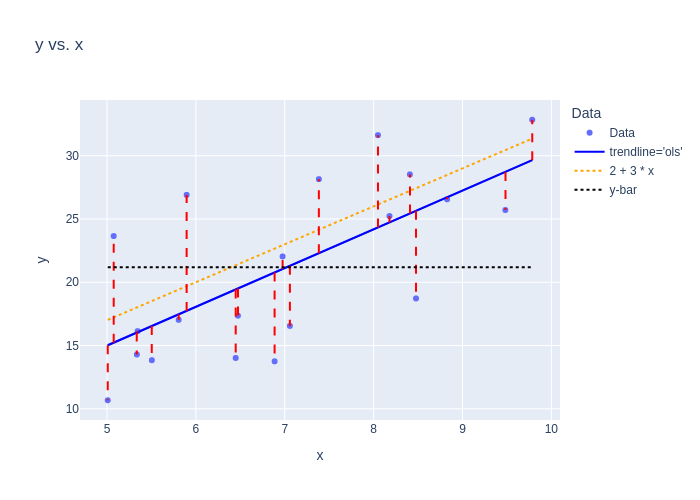

In [6]:
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': y})
model_data_specification = smf.ols("y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The line is chosen when the sum of the square of the error between the observed data and the predicted value(based on the line) is the least. The squares in the method make sure that the error is positive and is more sensitive to outliers.

### 6. Building on the previous questions... confirm that the following explain what the two np.corrcoef... expressions capture, why the final expression can be interpreted as "the proportion of variation in (outcome) y explained by the model (fitted_model.fittedvalues)", and therefore why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model


A. `fitted_model.rsquared`

B. `np.corrcoef(y,x)[0,1]**2`

C. `np.corrcoef(y,fitted_model.fittedvalues)[0,1]**2`

D. `1-((y-fitted_model.fittedvalues)**2).sum()/((y-y.mean())**2).sum()`

For B, the method captures the square of the correlation coefficient at the 0th row and the 1th column in the correlation coefficient matrix calculated based on y and x. While the matrix in C is based on y and the fitted values, the output of the function is the same as B.

For D, it calculates the proportion of the sum of squared difference in y and fitted values and the sum of squared difference in y and the mean. The sum of the squared difference is the variation. However, since the numerator is the variation of fitted values, the whole thing is explained by the model. A is the same thing as D, which overall measures how far it is that the predicting values from the model from the true data, in other words, the accuracy of the model.

### 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification do not seem compatible with the example data below

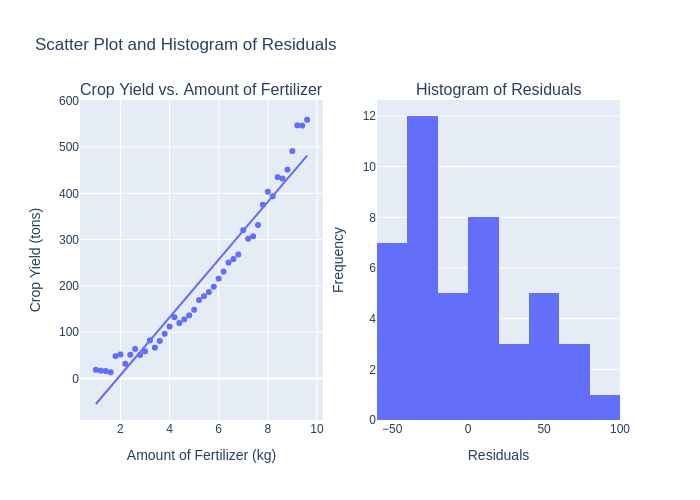

In [7]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The condition of using simple linear regression is that the data seems linear. However, the data provided in the code is not linear

## Nov04 HW

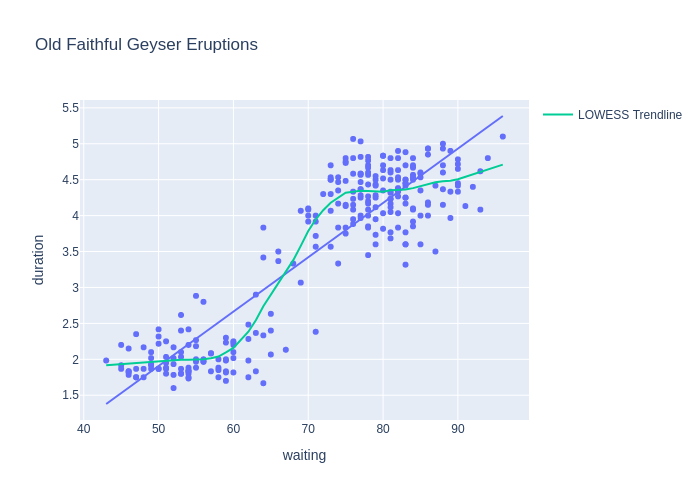

In [8]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

denote Y to be the the eruption duration, X to be the waiting time between eruptions.

the simple linear regression model Y = beta_0 + beta_1 * X

$H_0$: beta_1 = 0

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

In [9]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        02:11:09   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


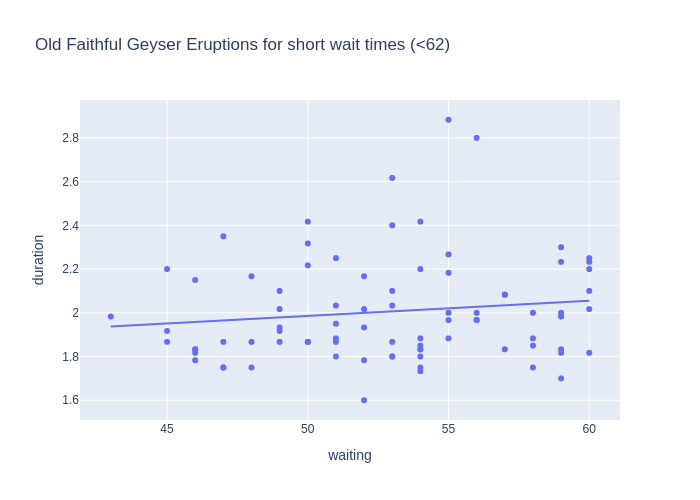

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


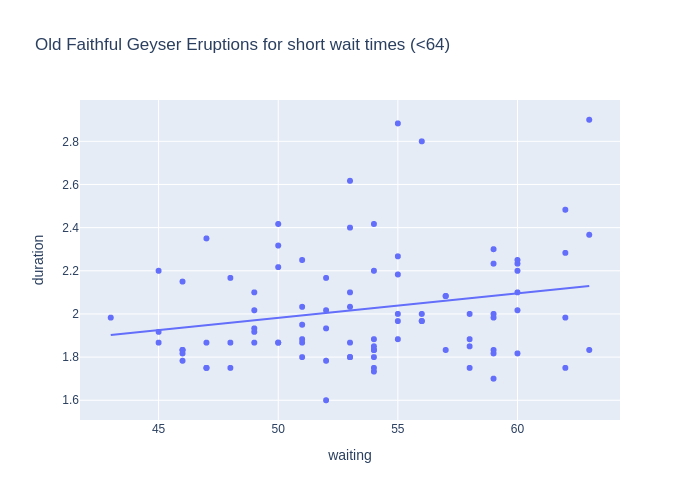

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


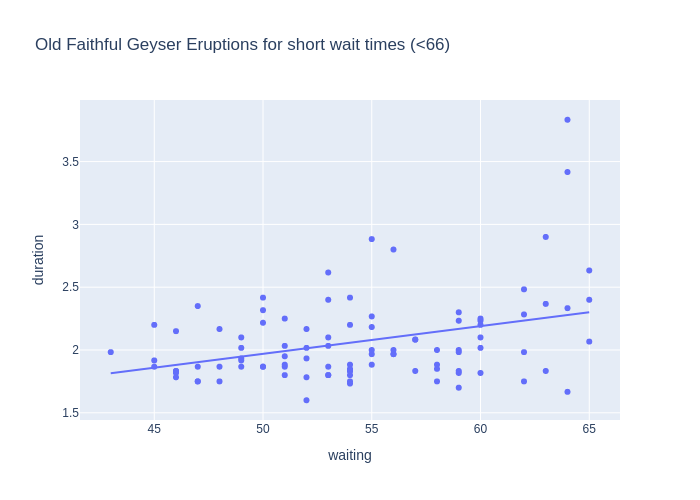

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

For all 3 criteria, we have at least moderate evidence to reject the null hypothesis.

### 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


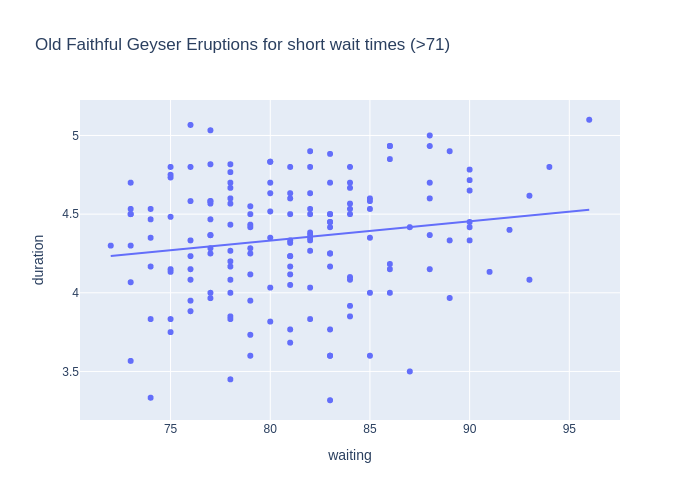

In [13]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. create fitted Simple Linear Regression models for boostrap samples and collect and visualize the bootstrapped sampling distribution of the fitted slope coefficients of the fitted models;

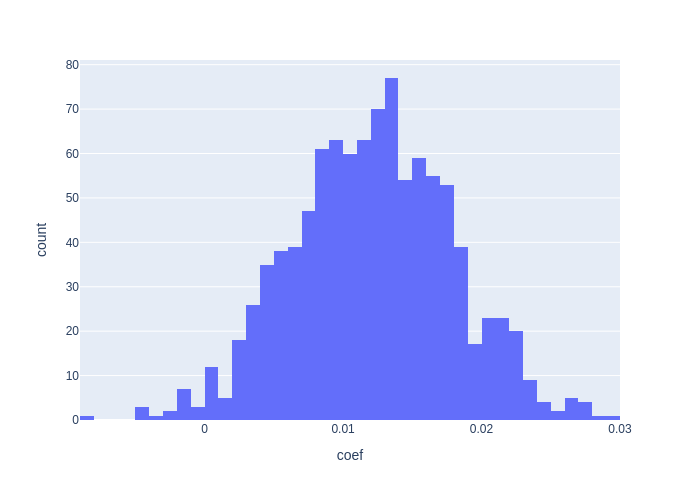

In [14]:
n = 1000
bootstrapped_coef = np.zeros(n)
for i in range(n):
    
    bootstrapped_dots = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    temp_model = smf.ols('duration ~ waiting', data=bootstrapped_dots).fit()
    param = temp_model.params['waiting']
    
    bootstrapped_coef[i] = param

df_coef = pd.DataFrame(bootstrapped_coef)
df_coef = df_coef.rename({0: 'coef'}, axis=1)
fig = px.histogram(df_coef, x='coef')
fig.show(renderer="png")

2. simulate samples (of size n=160) from a Simple Linear Regression model that uses beta_0 = 1.65, beta_1 = 0, sigma = 0.37, along with the values of `waiting` for to create simuations of Y and use these collect and visualize the sampling distribution of the fitted slope coefficient under a null hypothesis assumption of "no linear association (on average)";

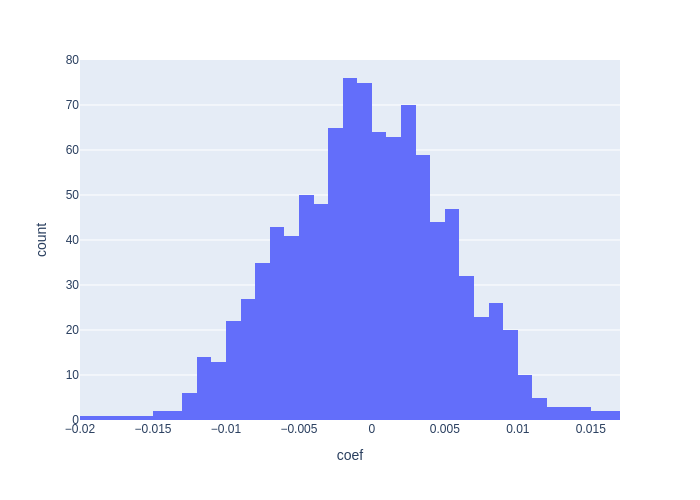

In [15]:
old_faithful_simulation = old_faithful[long_wait].copy()

n_sims = 1000
sim_coef = np.zeros(n_sims)
for i in range(n_sims):
    old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())
    temp_sim_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    param = temp_sim_model.params['waiting']
    sim_coef[i] = param

df_sim_coef = pd.DataFrame(sim_coef)
df_sim_coef = df_sim_coef.rename({0: 'coef'}, axis=1)
fig = px.histogram(df_sim_coef, x='coef')
fig.show(renderer="png")

3. report if 0
 is contained within a 95% bootstrapped confidence interval; and if the simulated p-value matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?

In [16]:
confidence_interval = (np.quantile(df_coef, 0.025), np.quantile(df_coef, 0.975))
confidence_interval

(0.0007324877367637855, 0.0230948445171841)

In [17]:
p_value = \
    (abs(df_sim_coef - 0) >= \
    abs(3.352 - 0)).sum()/n_sims
p_value

coef    0.0
dtype: float64

0 is not included in the 95% confidence interval. The p_value matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`

### 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

    Y_i = beta_intercept + 1_["long"](k_i)beta__contrast + epsilon_i, where epsilon_i ~ N(0, sigma)

where we use k_i
 (rather than x_i
) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


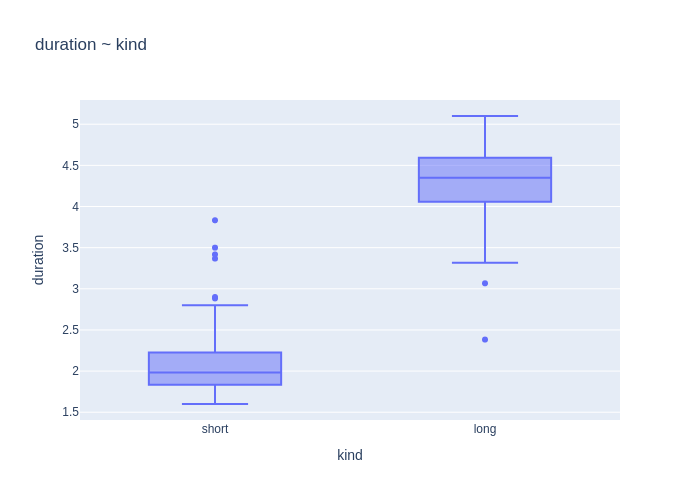

In [18]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

this model shows the difference of the average wait times of the 2 categories in a linear regression way. If there are no difference, the line would've been a flat line, which means that the null hypothesis is true. However, the p-value is < 0.001, which provides a very strong evidence against the null hypothesis.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

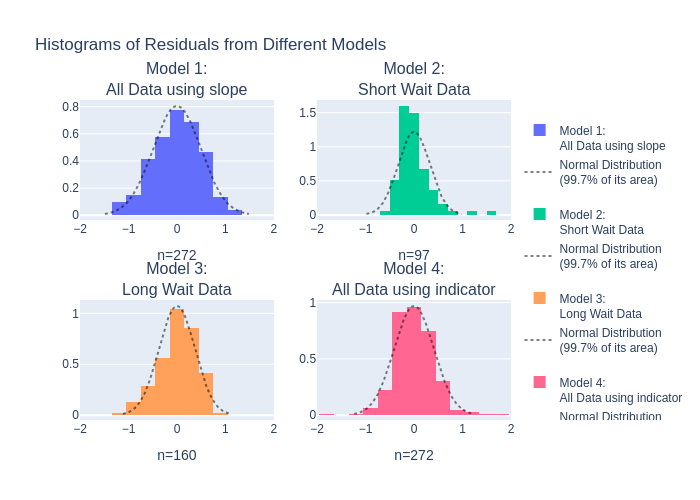

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The model 1 shows that the distribution of the residuals is normal. If the distribution is not normal, then the shape won't be a normal distribution, or the standard deviation is changing. For model 1, the shape is almost perfectly fit to a normal distribution, and the spread is even and unchanged. For model 2, there are data out of the range of the normal distribution, which is unlikely to happen if the assumption is correct, showing that the standard deviation is changing. The model 4 has the same issue as model 2. For model 3, the data is skewed, which means that the standard deviation is changing. 

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

#### (A) Do a permuation test $H_0$: mu_short = mu_long no difference in duation between short and long groups by "shuffling" the labels

In [21]:
# < 68 short, >= 68 long

sample_size = len(old_faithful)
n_bootstraps = 1000

label_permutation_mean_differences = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    old_faithful['Shuffled Kind'] = old_faithful['kind'].sample(n=sample_size, replace=False).values
    label_permutation_mean_differences[i] = \
        old_faithful.groupby('Shuffled Kind')['duration'].mean().diff().values[1]

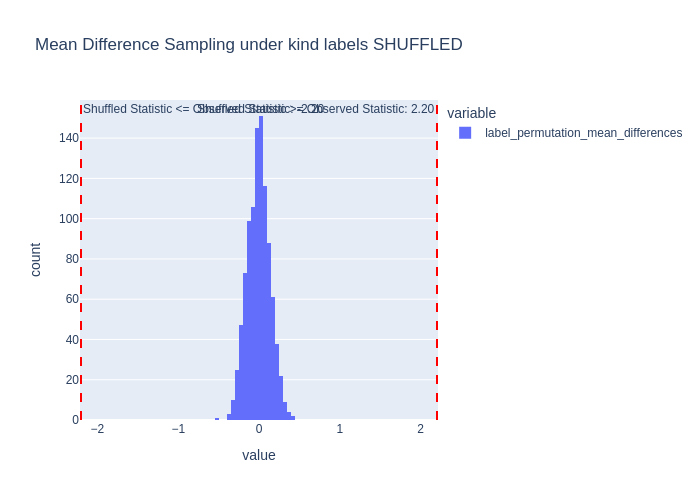

p-value: 0


In [26]:
fig = px.histogram(pd.DataFrame({"label_permutation_mean_differences": label_permutation_mean_differences}), nbins=30,
                                title="Mean Difference Sampling under kind labels SHUFFLED")

mean_differene_statistic = old_faithful.groupby('kind')['duration'].mean().diff().values[1]

fig.add_vline(x=mean_differene_statistic, line_dash="dash", line_color="red",
              annotation_text=f"Shuffled Statistic <= Observed Statistic: {mean_differene_statistic:.2f}",
              annotation_position="top right")
fig.add_vline(x=-mean_differene_statistic, line_dash="dash", line_color="red",
              annotation_text=f"Shuffled Statistic >= Observed Statistic: {-mean_differene_statistic:.2f}",
              annotation_position="top left")
fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print("p-value:", 0)

#### (B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

In [27]:
within_group_bootstrapped_mean_differences = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    double_bootstrap = \
        old_faithful.groupby("kind")[["kind","duration"]].sample(frac=1, replace=True)
    within_group_bootstrapped_mean_differences[i] = \
        double_bootstrap.groupby('kind')["duration"].mean().diff().values[1]
    
np.quantile(within_group_bootstrapped_mean_differences, [0.025,0.975])    

array([-2.2996429 , -2.10261926])

#### (a) Explain how the sampling approaches work for the two simulations.

For permutation test, it is a method for simulation under the assumption that the null hypothesis is true. It simulates that when the group labels doesn't matter, in other words, when the null hypothesis is true. 

For double bootstrapping, since the 2 samples aren't paired, we can't directly pair them with each other and take it as one sample. So, we bootstrap both samples side by side, take the difference as we care about whether the mean is equal, in order to obtain an inference of the parameter. 

#### (b) Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.


The indicator variable approach is a way of doing hypothesis test using linear regression. The idea of these methods are similar——they are trying to reject the null hypothesis. 

The indicator method can be used to reject the null hypothesis, just like permutation test. Similar to double bootstrapped confidence intervals, the indicator approach provides an inference, while the permuation test can't. However, the indicator approach uses linear regression, in other words, we can sketch the graph to provide a visualization, where double bootstrapping only provides an interval which is hard to visualize.

### 14. yes